In [230]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler



In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
my_data = pd.read_csv("/content/drive/MyDrive/ml_assinments/ass_1/housing.csv")

#2, 3 Describing the data

In [233]:
my_df = pd.DataFrame(my_data)
#print first 4 rows in the dataframe
print(my_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [234]:
#This gives the number of rows and columns in the data
print(my_df.shape)

(20640, 10)


this describe function can be used to get a lot of useful insights on the data, or the different metric can be called seperately

In [235]:
print(my_df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [236]:
#Creating a new copy with only numeric columns
my_copy_df = my_df.copy()
my_copy_df.drop('ocean_proximity', axis=1, inplace=True)
my_copy_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


#4 Discriptive statictice of the data

In [237]:
def metric_call():
  print("Mean of the data:\n", my_copy_df.mean())
  print("\nMedian fo the data:\n", my_copy_df.median())
  print("\nStandard Deviation of the data:\n", my_copy_df.std())
  print("\nMin in the data:\n", my_copy_df.min())
  print("\nMax of the data:\n", my_copy_df.max())

metric_call()


Mean of the data:
 longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

Median fo the data:
 longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

Standard Deviation of the data:
 longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income

#5 Getting null values

In [238]:
#This gives the number of null values present in each cloumn
print(my_df.isnull().sum())

#This is used to find which of the colums have null values
print(my_df.isnull())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False

to fill the NaN values with the median of th respective column

In [239]:
my_fill_df = my_copy_df.fillna(my_copy_df.median())
print(my_fill_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [240]:
#This is used to fill  null values in the non numeric cloumns also
categorical_columns = my_df.select_dtypes(exclude=np.number).columns.tolist()
numeric_columns = my_df.select_dtypes(include=np.number).columns.tolist()

my_df[numeric_columns] = my_df[numeric_columns].fillna(my_df[numeric_columns].median())

for column in categorical_columns:
    my_df[column].fillna(my_df[column].mode()[0], inplace=True)

print(my_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#6 plot the data before and after filling the NaN values

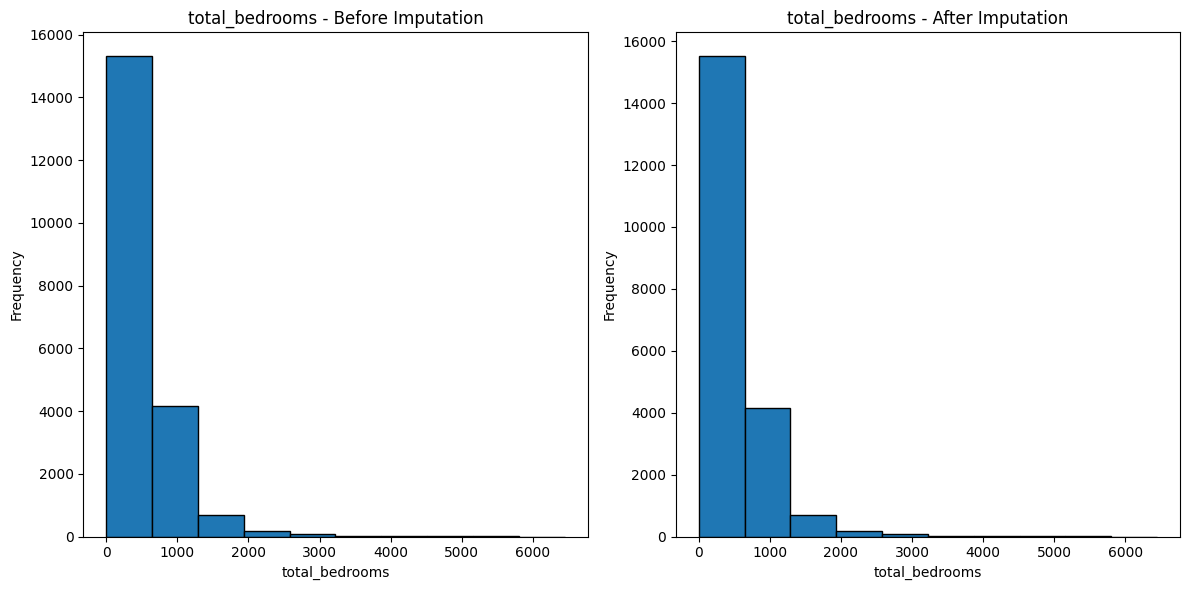

In [241]:
def comp_func(elem):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  my_copy_df[elem].plot(kind='hist', ax=axes[0], title=f'{elem} - Before Imputation', edgecolor='black')
  axes[0].set_xlabel(elem)

  my_fill_df[elem].plot(kind='hist', ax=axes[1], title=f'{elem} - After Imputation', edgecolor='black')
  axes[1].set_xlabel(elem)

  plt.tight_layout()
  plt.show()

#Here, we only call the comparator function on this one column as only this column had null values in the beginning
comp_func('total_bedrooms')

#7 removing the duplicate values

In [242]:
#This following call is used to remove the duplicates in the data
my_fill_df.drop_duplicates(inplace=True)

#8 Plot map

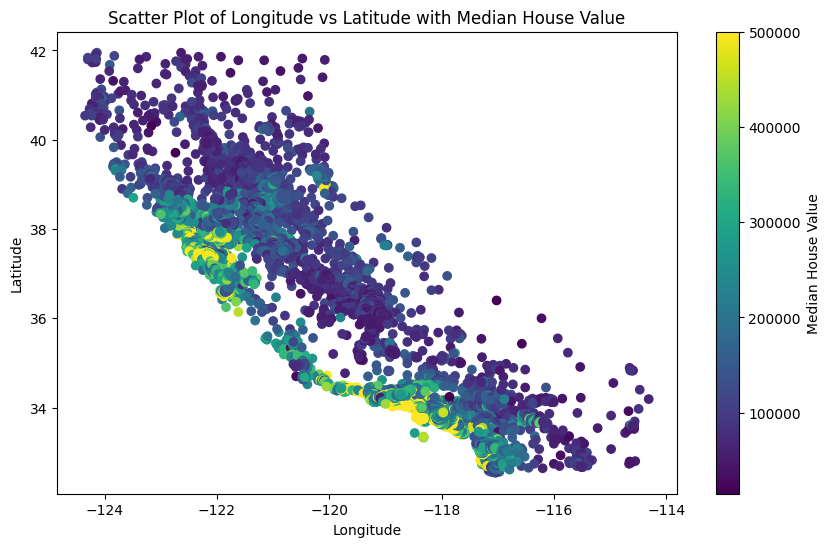

In [243]:
longitude = my_fill_df['longitude']
latitude = my_fill_df['latitude']
median_house_value = my_fill_df['median_house_value']


plt.figure(figsize=(10, 6))
scatter = plt.scatter(longitude, latitude, c=median_house_value)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude with Median House Value')
plt.show()

#9 Observations on the data

Observation 1: Number of Houses with total_bedrooms Less Than 1500


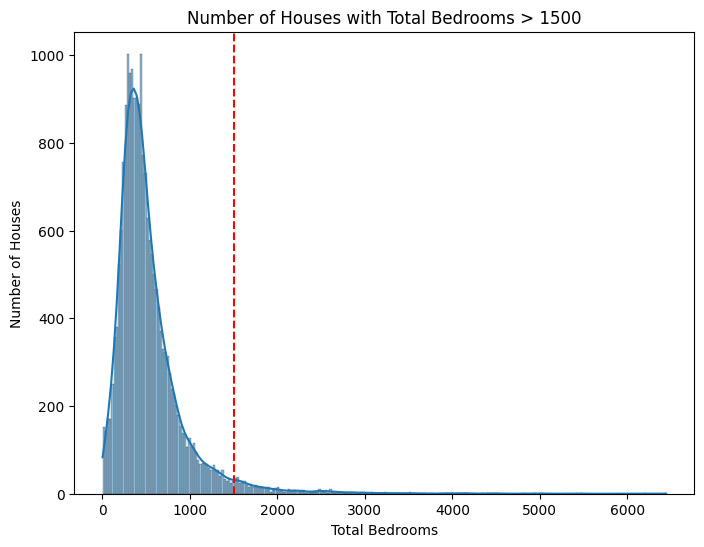

In [244]:
# Filter the data for houses with total_bedrooms less than 1500
bedrooms_less_than_1500 = my_fill_df[my_fill_df['total_bedrooms'] >= 1500].shape[0]

# Plotting the number of houses with total_bedrooms > 1500
plt.figure(figsize=(8, 6))
sns.histplot(my_fill_df['total_bedrooms'], kde=True)
plt.axvline(1500, color='red', linestyle='--')
plt.title(f'Number of Houses with Total Bedrooms > 1500')
plt.xlabel('Total Bedrooms')
plt.ylabel('Number of Houses')
plt.show()




Observation 2: Median Income Distribution


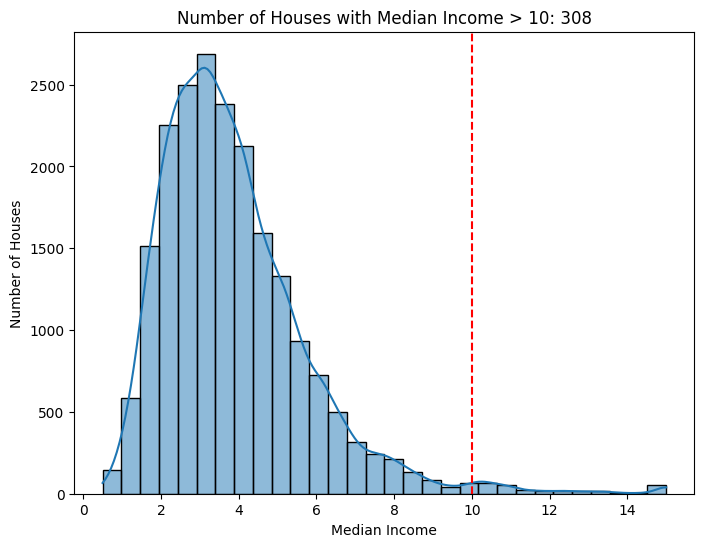

In [245]:
# Number of houses where median income is more than 10
high_income_houses = my_fill_df[my_fill_df['median_income'] > 10].shape[0]

# Plotting median income distribution
plt.figure(figsize=(8, 6))
sns.histplot(my_fill_df['median_income'], kde=True, bins=30)
plt.axvline(10, color='red', linestyle='--')
plt.title(f'Number of Houses with Median Income > 10: {high_income_houses}')
plt.xlabel('Median Income')
plt.ylabel('Number of Houses')
plt.show()


Observation 3: Relationship Between House Age and Median House Value


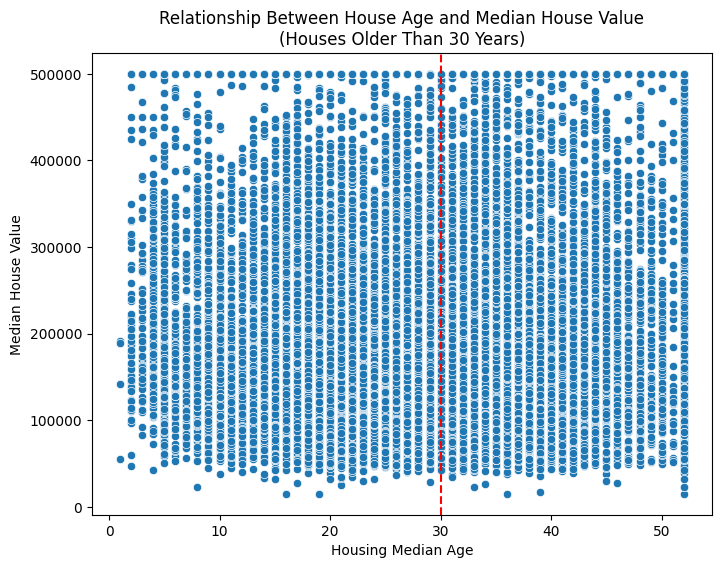

In [246]:
# Houses older than 30 years and their median house value
old_houses_value = my_fill_df[my_fill_df['housing_median_age'] > 30]['median_house_value']

# Plotting the relationship between house age and median house value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=my_fill_df)
plt.axvline(30, color='red', linestyle='--')
plt.title(f'Relationship Between House Age and Median House Value\n(Houses Older Than 30 Years)')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()


Observation 4: Number of Houses with More than 2 Rooms per Household



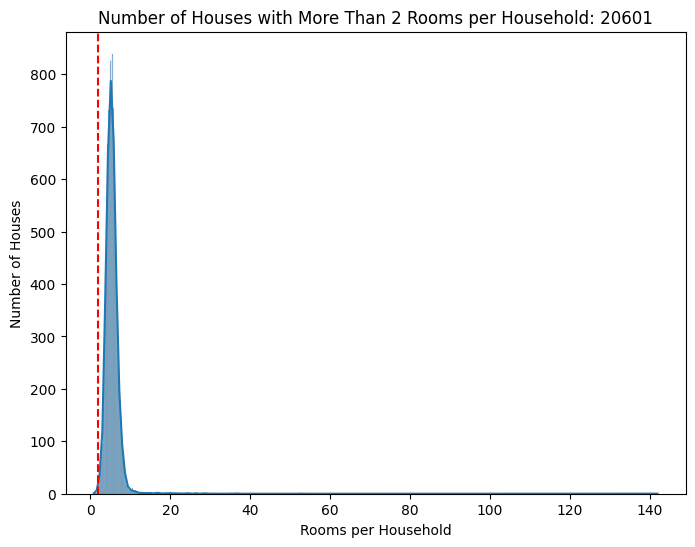

In [247]:
my_new_df = my_fill_df.copy()
# Adding a new column for rooms per household
my_new_df['rooms_per_household'] = my_new_df['total_rooms'] / my_new_df['households']

# Number of houses with more than 2 rooms per household
houses_more_than_2_rooms = my_new_df[my_new_df['rooms_per_household'] > 2].shape[0]

# Plotting the number of houses with more than 2 rooms per household
plt.figure(figsize=(8, 6))
sns.histplot(my_new_df['rooms_per_household'], kde=True)
plt.axvline(2, color='red', linestyle='--')
plt.title(f'Number of Houses with More Than 2 Rooms per Household: {houses_more_than_2_rooms}')
plt.xlabel('Rooms per Household')
plt.ylabel('Number of Houses')
plt.show()


#10 Grouping the data based on the 'ocean_proximity' column

In [248]:
my_grouped_df = my_df.groupby('ocean_proximity')

unique_values = set(my_df['ocean_proximity'])
#NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND

print("unique values in the cloumn ocean_proximity\n", unique_values)

print(my_grouped_df.describe())


unique values in the cloumn ocean_proximity
 {'NEAR BAY', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN', 'INLAND'}
                longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...

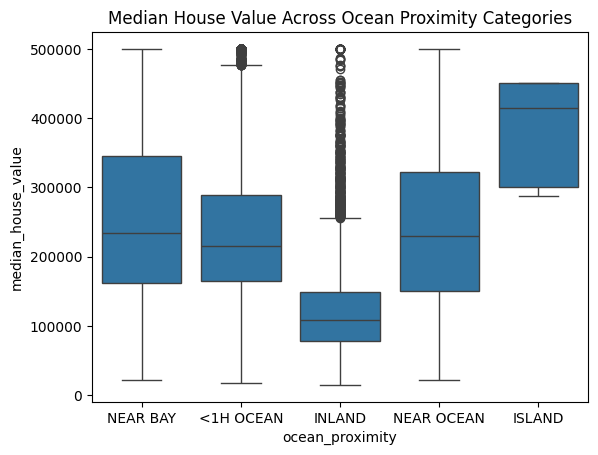

In [249]:
# Visualizing the distribution of median_house_value across ocean_proximity categories also print the

sns.boxplot(x='ocean_proximity', y='median_house_value', data=my_df)
plt.title('Median House Value Across Ocean Proximity Categories')
plt.show()


In [250]:
#Encoding the ocean_proximity values
ocean_labels = LabelEncoder()
my_fill_df['ocean_proximity'] = ocean_labels.fit_transform(my_df['ocean_proximity'])
my_fill_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [251]:
print(set(my_fill_df['ocean_proximity']))

{0, 1, 2, 3, 4}


#11 Creating hearmaps to better corelate the ocean_proximity values with other numerial values

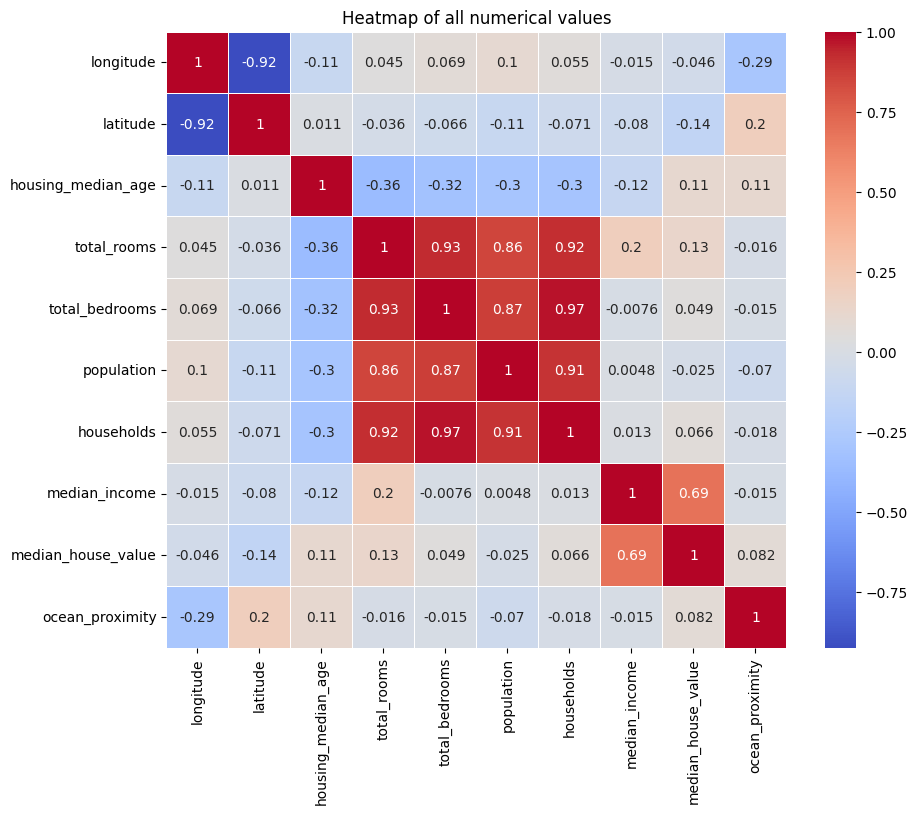

In [252]:
plt.figure(figsize=(10,8))
sns.heatmap(my_fill_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of all numerical values')
plt.show()

We see a strong correlations between the features longitude and latitude.
Also the features total_rooms, total_bedrooms, population and households have strong correlations between one another. Values closer to 1 or -1 show features with high correlations.

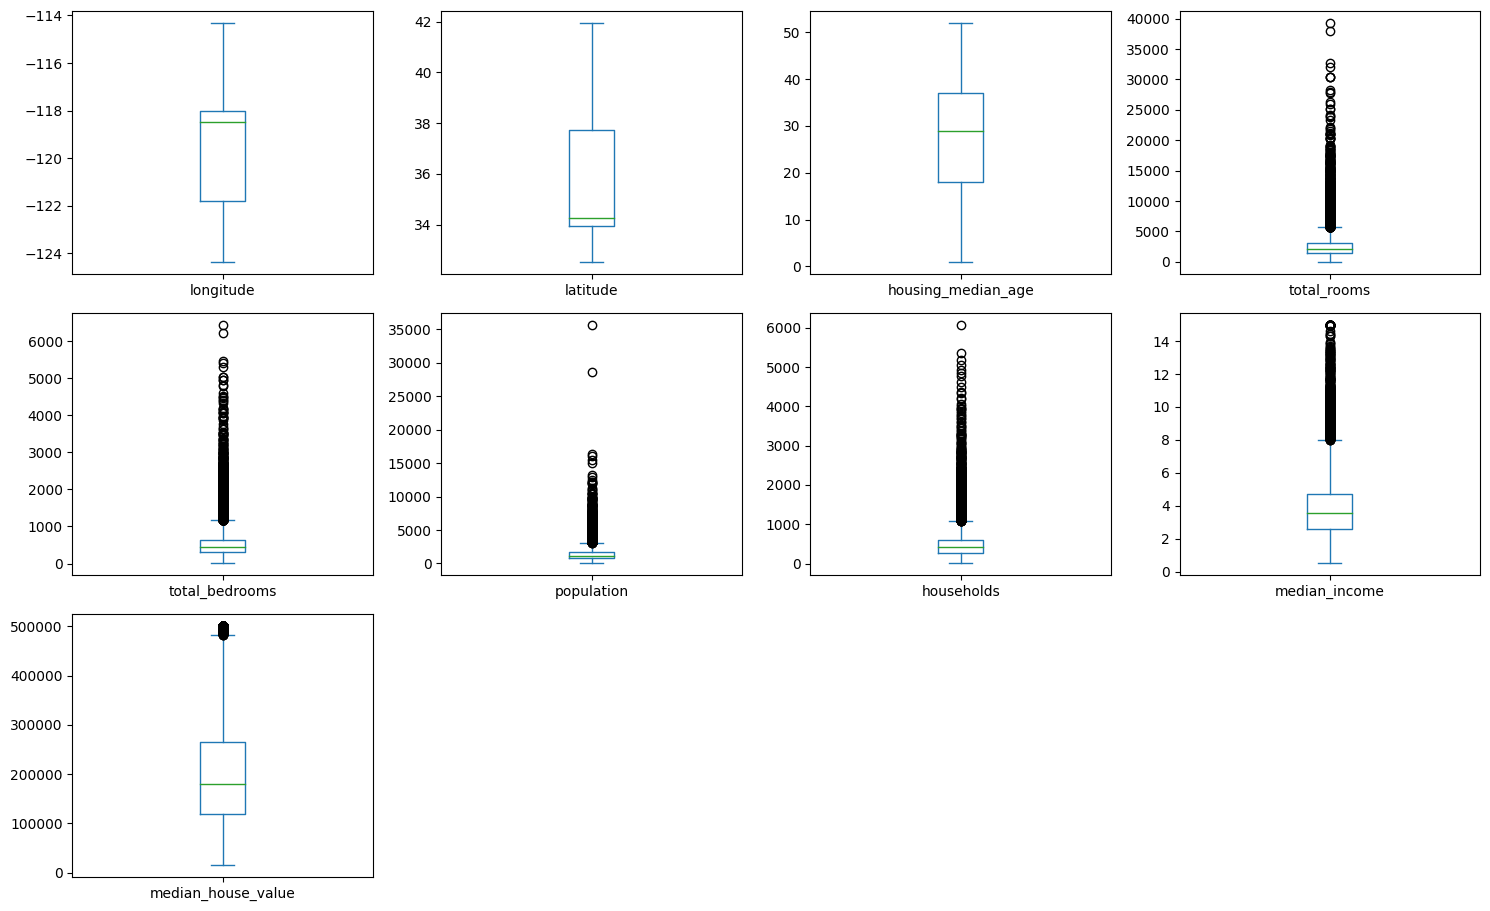

In [253]:
my_fill_df.drop(['ocean_proximity'], axis=1).plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 12))
plt.tight_layout()
plt.show()


All the black dots above the Max line of the boxplot indicates the presence of outliers. The columns median_house_value, median_income, households, population, total_bedrooms, total_rooms have outliers.

Boxplots with more spread has more importance than the features with small spread. Features like median_house_value, housing_median_age, longitude, latitude have a wider spread compared to other features.

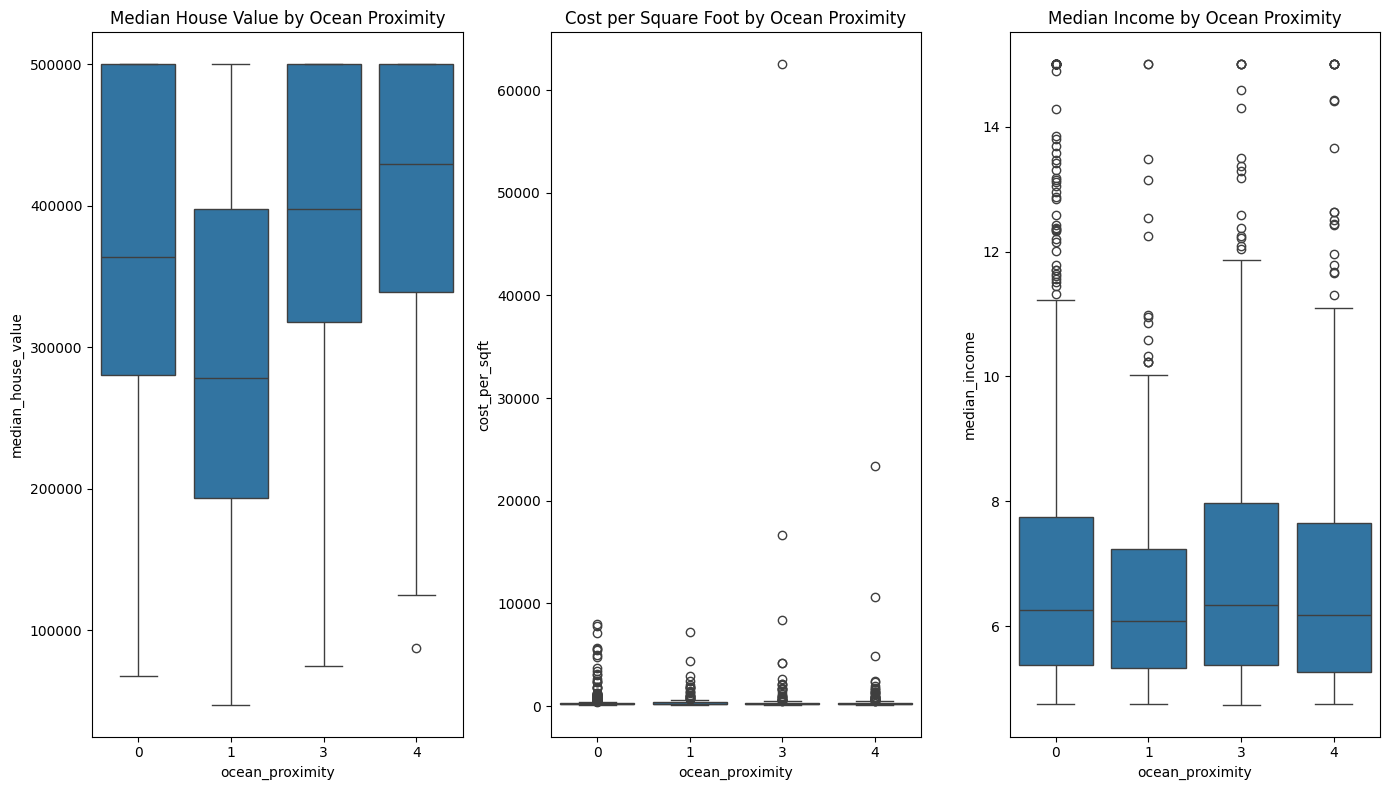

In [254]:
# Calculate cost per square foot
my_fill_df['cost_per_sqft'] = my_fill_df['median_house_value'] / my_fill_df['total_rooms']

#Defining what a premium house is
premium_houses = my_fill_df[(my_fill_df['cost_per_sqft'] > my_fill_df['cost_per_sqft'].quantile(0.75)) &
                      (my_fill_df['median_income'] > my_fill_df['median_income'].quantile(0.75))]

plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=premium_houses)
plt.title('Median House Value by Ocean Proximity')

plt.subplot(1, 3, 2)
sns.boxplot(x='ocean_proximity', y='cost_per_sqft', data=premium_houses)
plt.title('Cost per Square Foot by Ocean Proximity')

plt.subplot(1, 3, 3)
sns.boxplot(x='ocean_proximity', y='median_income', data=premium_houses)
plt.title('Median Income by Ocean Proximity')

plt.tight_layout()
plt.show()

the above graph shows that ocean_proximity of category 2 has no premium_houses  

#12 Generating three plots


In [255]:
#Getting all column names, this enables the later functions to be called on any column
col_list = list(my_fill_df.columns.values)
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'cost_per_sqft']


total_bedrooms


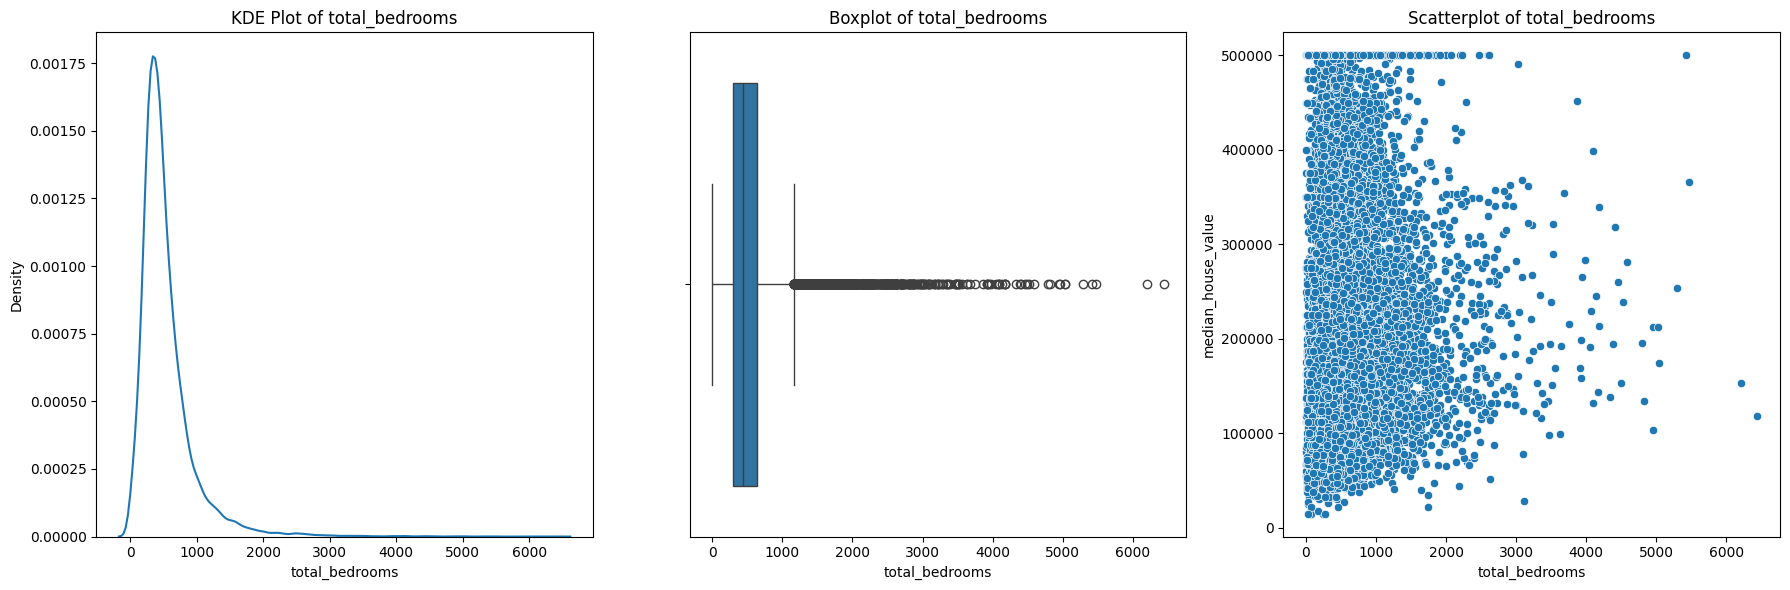

In [256]:

def plot_all(elem):
  print(elem)
  fig, axis = plt.subplots(1, 3, figsize=(18, 6))

  sns.kdeplot(my_fill_df[elem], ax=axis[0])
  axis[0].set_title(f'KDE Plot of {elem}')

  sns.boxplot(x=my_fill_df[elem], ax=axis[1])
  axis[1].set_title(f'Boxplot of {elem}')

  sns.scatterplot(x = my_fill_df[elem], y = my_fill_df['median_house_value'], ax=axis[2])
  axis[2].set_title(f'Scatterplot of {elem}')

  plt.tight_layout()
  plt.show()

plot_all(col_list[4])

#13 Finding the outliers in each column

Number of outliers in the column total_rooms: 742




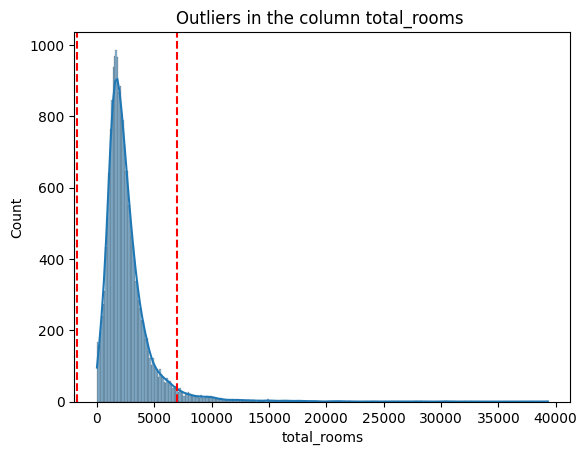

In [257]:
#We are finding the outliers in the column of housing_median_age in the following code
def find_outliers(elem):
  mean = my_fill_df[elem].mean()
  std_dev = my_fill_df[elem].std()
  lower_limit = mean - 2 * std_dev
  upper_limit = mean + 2 * std_dev

  outliers = my_fill_df[(my_fill_df[elem] < lower_limit) | (my_fill_df[elem] > upper_limit)]
  print(f'Number of outliers in the column {elem}: {outliers.shape[0]}')
  print('\n')

  sns.histplot(my_fill_df[elem], kde=True)
  plt.axvline(lower_limit, color='red', linestyle='--')
  plt.axvline(upper_limit, color='red', linestyle='--')
  plt.title(f'Outliers in the column {elem} ')
  plt.show()

find_outliers(col_list[3])

#14 Scaling the data

In [258]:

def scaling_data(elem):
  print(elem)
  std_sc = StandardScaler()
  my_stdscal_df = std_sc.fit_transform(my_fill_df[[elem]])
  #print("Standard Scaler \n",my_stdscal_df)

  min_max_sc = MinMaxScaler()
  my_minmax_df = min_max_sc.fit_transform(my_fill_df[[elem]])
  #print("\nMin Max Scaling \n",my_minmax_df)

  print(f'Standard Scaler Min {my_stdscal_df.min()} Max {my_stdscal_df.max()}')
  print(f'Min Max Scaling Min {my_minmax_df.min()} Max {my_minmax_df.max()}')

scaling_data(col_list[3])


total_rooms
Standard Scaler Min -1.2072829451495584 Max 16.815579920800463
Min Max Scaling Min 0.0 Max 0.9999999999999999


StandardScaler - This functions centers the scaling around 0 but it is also sensitive to outliers.

MinMaxScaler - This scalar function is good at preserving the relations between the data but is very sensitive to outliers.


RobustScaler - Better at dealing outliers but performs scaling not around 0. Better at dealing with outliers over the above two employed methods.

QuantileTransformer - Generates a uniform scaling at the cost of loosing the relations between data. This is used when we need specific scaling on the data, rather than the standard scalars like the above two.

PowerTransformer - Creates a normalized scaling but is extremely dependent on the type of data in question. Good at dealing with skewed data.